### Name-Riya Sen
### Reg no-200810020757
### Enrollment no-20/10/MT/005
### Subject-Statistical Inference and Multivariate Techniques
### Assingment 2


### a) Performing PCA to reduce the number of independent variables
   <p>I am using small data set company_nutrision servey data set which have 317 rows and 11 columns. Using PCA I will try to reduce into 2 coloums</p>

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('food_nutricion.csv')
print(df.head(5))
print(df.shape)

  Company     id   mois   prot    fat   ash  sodium  carb   cal  zink  calcium
0       A  14069  27.82  21.43  44.87  5.11    1.77  0.77  4.93  5.11     0.77
1       A  14053  28.49  21.26  43.89  5.34    1.79  1.02  4.84  5.34     1.02
2       A  14025  28.35  19.99  45.78  5.08    1.63  0.80  4.95  5.08     0.80
3       A  14016  30.55  20.15  43.13  4.79    1.61  1.38  4.74  4.79     1.38
4       A  14005  30.49  21.28  41.65  4.82    1.64  1.76  4.67  4.82     1.76
(317, 11)


In [55]:
br=df['Company']
data=df.drop('Company',axis=1)
print(data.shape)
print(br.shape)

(317, 10)
(317,)


In [56]:
std_d=StandardScaler().fit_transform(data)
print(std_d.shape)

(317, 10)


In [57]:
sample_data=std_d
covar_matrix=np.matmul(sample_data.T,sample_data)
print("the shape of covariance matrix=",covar_matrix.shape)

the shape of covariance matrix= (10, 10)


In [58]:
from scipy.linalg import eigh
values,vectors=eigh(covar_matrix,eigvals=(6,7))

print(vectors.shape)
vectors=vectors.T
print(vectors.shape)

(10, 2)
(2, 10)


In [59]:
new_coordinates=np.matmul(vectors,sample_data.T)
print(vectors.shape,"X",sample_data.shape, "=",new_coordinates.shape)

(2, 10) X (317, 10) = (2, 317)


In [60]:
new_co_dints=np.vstack((new_coordinates,br)).T
dataframe=pd.DataFrame(data=new_co_dints,columns=("PCA1","PCA2","Company"))
print(dataframe.head())

       PCA1      PCA2 Company
0  0.062773 -0.593911       A
1  0.085398 -0.608372       A
2  0.118127 -0.590236       A
3  0.160599 -0.624931       A
4  0.024143 -0.653333       A


C:\Users\riya\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


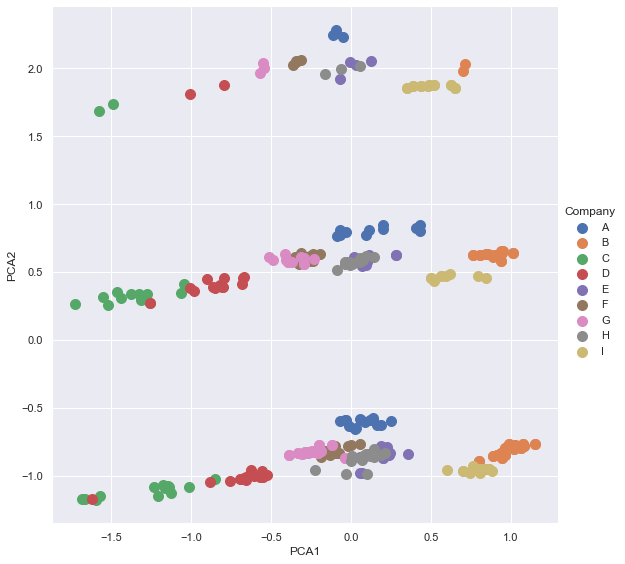

In [61]:
import seaborn as sn
sn.FacetGrid(dataframe,hue="Company",size=8).map(plt.scatter,"PCA1","PCA2",s=100).add_legend()


### *** perform clustring analysis....as our question is 


C:\Users\riya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


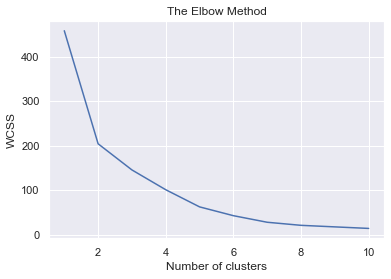

In [62]:

from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
X=dataframe.iloc[:,0:2]

from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [63]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 4 4 1 1 1 4 4 1 1 5 5 5 5 5 5 5 5
 5 5 1 1 5 5 5 5 5 1 1 1 1 1 1 1 1 4 1 1 1 4 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 4 2 2 4
 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 4 4 4 1 4 3 1 4
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 4 2 4 4 2 3 2 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 4 4 2 4 2 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 1 1 1 1 1 1 1 1 4 4 1 4 1 1 1 1 5 5 5 1 1 1 1 5 5 5 5 5 5 5 5 1 5 5 5 1
 4 4 4 1 4 4 4 4 4 5 5 5 1 4 4 4 1 4 4 4 4 4 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 5 5 5 5 5 5 5 5 5 1 1 5 5 5 5 5 1 1 1]


### As elbow method with minimum deviation is at 6 to 8 . So we take k=6 and perform clusttring

In [64]:
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


C:\Users\riya\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random', 'fft', 'linalg', 'power']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


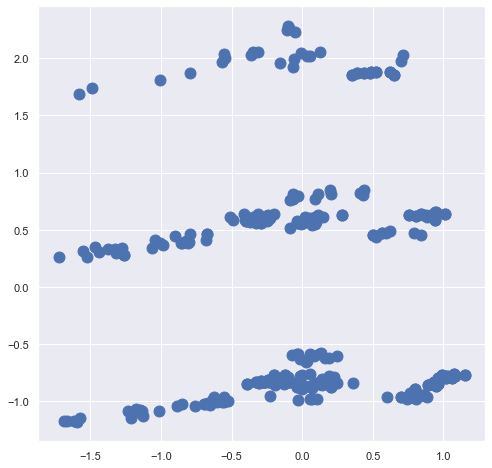

In [65]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans


plt.figure(figsize=(8, 8))

plt.scatter(dataframe['PCA1'],dataframe['PCA2'],s=120)

plt.show()


In [66]:
x = dataframe.iloc[:,0:2] 
x

,PCA1,PCA2
0,0.062773,-0.593911
1,0.085398,-0.608372
2,0.118127,-0.590236
3,0.160599,-0.624931
4,0.024143,-0.653333
...,...,...
312,0.800244,-0.892155
313,0.891226,-0.855414
314,0.760792,0.625492
315,1.014247,0.63817


In [67]:
kmeans = KMeans(6)
kmeans.fit(x)

KMeans(n_clusters=6)

In [68]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 2, 2, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4,
       4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 2, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2,
       3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 2, 2, 3, 2, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 4, 4, 4,
       0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 4, 4, 4, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4,

###### data set graph after perfoming clusttring where k=6 sub groups

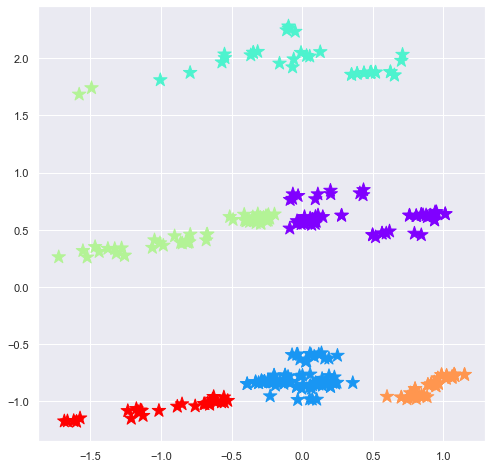

In [69]:
data_with_clusters = dataframe.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.figure(figsize=(8, 8))
plt.scatter(data_with_clusters['PCA1'],data_with_clusters['PCA2'],c=data_with_clusters['Clusters'],s=200,marker='*',cmap='rainbow')

### marker style for club pic code $\clubsuit$

<h2 style="color:red"> ii) Choose any one variable as dependent and the rest being independent and perform linear regression analysis</h2>

### Here I am going to perfoem linear regression on reduced data set .

In [27]:
dataframe

,PCA1,PCA2,Company
0,0.062773,-0.593911,A
1,0.085398,-0.608372,A
2,0.118127,-0.590236,A
3,0.160599,-0.624931,A
4,0.024143,-0.653333,A
...,...,...,...
312,0.800244,-0.892155,B
313,0.891226,-0.855414,B
314,0.760792,0.625492,B
315,1.014247,0.63817,B


In [28]:
feature_cols = ['PCA1']
X = dataframe[feature_cols]
y = dataframe['PCA2']
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
print(lm.intercept_)
print(lm.coef_)

-1.8492042807636673e-16
[-1.98188558e-16]


In [29]:
X_new = pd.DataFrame({'1st_principle': [2.16]})
X_new.head()

,1st_principle
0,2.16


In [30]:
lm.predict(X_new)

array([-6.13007714e-16])

In [35]:
X_new = pd.DataFrame({'PCA1': [dataframe['PCA1'].min(), dataframe['PCA1'].max()]})
X_new.head()

,PCA1
0,-1.725081
1,1.151079


In [36]:
preds = lm.predict(X_new)
preds

array([ 1.56970956e-16, -4.13051212e-16])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


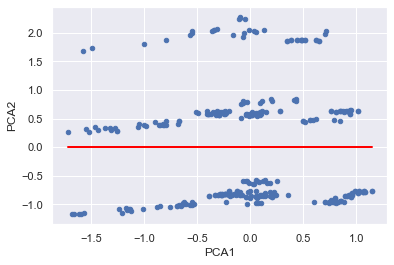

In [37]:
dataframe.plot(kind='scatter', x='PCA1', y='PCA2')
plt.plot(X_new, preds, c='red', linewidth=2)


### Here my assingment is completed as per question. but this is not fit model for linear regression so it is showning not good accuracy.....
### let try by adding some target column which is  independet on which pca cpmponents depend

### Given below is code for that

In [70]:
df1=pd.read_csv('food_nutricion.csv')
df1.drop(["Company", "id","mois","fat","ash","sodium","carb","cal","zink","calcium"], axis = 1, inplace = True)
dataframe['Protine']=df1['prot']
dataframe

,PCA1,PCA2,Company,Protine
0,0.062773,-0.593911,A,21.43
1,0.085398,-0.608372,A,21.26
2,0.118127,-0.590236,A,19.99
3,0.160599,-0.624931,A,20.15
4,0.024143,-0.653333,A,21.28
...,...,...,...,...
312,0.800244,-0.892155,B,14.87
313,0.891226,-0.855414,B,14.06
314,0.760792,0.625492,B,13.79
315,1.014247,0.63817,B,13.14


In [71]:
dataframe.isna().sum()

PCA1       0
PCA2       0
Company    0
Protine    0
dtype: int64

In [72]:
X=dataframe[['PCA1']]
y=dataframe['Protine']
y


0      21.43
1      21.26
2      19.99
3      20.15
4      21.28
       ...  
312    14.87
313    14.06
314    13.79
315    13.14
316    14.18
Name: Protine, Length: 317, dtype: float64

In [73]:

feature_cols = ['PCA1']
X = dataframe[feature_cols]
y = dataframe['Protine']
#X2=dataframe[feature_cols2]

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
#lm.fit(X2,y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

13.281104100946376
[-4.74562187]


In [79]:
X_new = pd.DataFrame({'PCA1': [1.01]})
X_new.head()

,PCA1
0,1.01


In [80]:
lm.predict(X_new)

array([8.48802602])

In [81]:
X_new = pd.DataFrame({'PCA1': [dataframe['PCA1'].min(), dataframe['PCA1'].max()]})
X_new.head()

,PCA1
0,-1.725081
1,1.151079


In [82]:
preds = lm.predict(X_new)
preds

array([21.46768783,  7.81851612])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


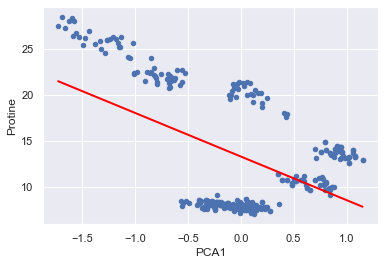

In [83]:

dataframe.plot(kind='scatter', x='PCA1', y='Protine')
plt.plot(X_new, preds, c='red', linewidth=2)

### This model has good accuracy then the previous model. as we see here at pca1 values 1.01427 has protine value is 13 but our model giving 9 which is not very good accuracy but good one.
### Thank you sir...